In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Data Importing

In [ ]:
df = pd.read_csv('MCI_2014_to_2022.csv',sep=',')
df['Total'] = 1
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,Total
0,-8.837009e+06,5.414638e+06,1,GO-20141265238,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,100,Assault,Assault,98,Rosedale-Moore Park,98,Rosedale-Moore Park (98),-79.384206,43.670798,1
1,-8.832733e+06,5.419701e+06,2,GO-20141259834,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,100,Assault With Weapon,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.345795,43.703684,1
2,-8.836444e+06,5.410819e+06,3,GO-20141262027,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,100,Assault,Assault,166,St Lawrence-East Bayfront-The Islands,77,Waterfront Communities-The Island (77),-79.379131,43.645981,1
3,-8.836897e+06,5.412101e+06,4,GO-20141259951,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,100,Assault Peace Officer,Assault,170,Yonge-Bay Corridor,76,Bay Street Corridor (76),-79.383200,43.654313,1
4,-8.851435e+06,5.422186e+06,5,GO-20141261561,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,100,Assault With Weapon,Assault,154,Oakdale-Beverley Heights,26,Downsview-Roding-CFB (26),-79.513797,43.719824,1


### Data Visualisation
---
#### Plotting bargraph for Major Crime Indicators

<Figure size 1500x600 with 0 Axes>

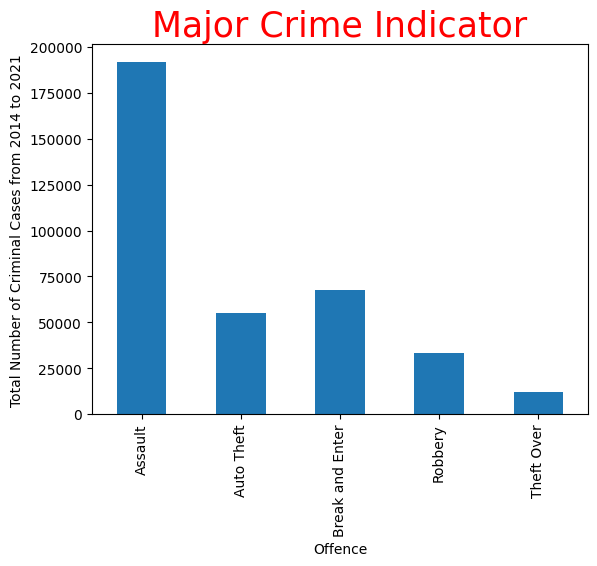

In [ ]:
major_crime_indicator = df.groupby('MCI_CATEGORY', as_index=False).size()

plt.figure(figsize=(15, 6))
ax = major_crime_indicator.plot.bar(x='MCI_CATEGORY', y='size', legend=False)
ax.set_xlabel('Offence')
ax.set_ylabel('Total Number of Criminal Cases from 2014 to 2021')
ax.set_title('Major Crime Indicator', color='red', fontsize=25)
plt.show()

#### Plotting Line Chart for Total Criminal Cases from 2014 to 2022


REPORT_YEAR
2016    33530
2017    35147
2018    37374
2019    40123
2020    35173
2021    35128
2022    41662
2023    36698
dtype: int64


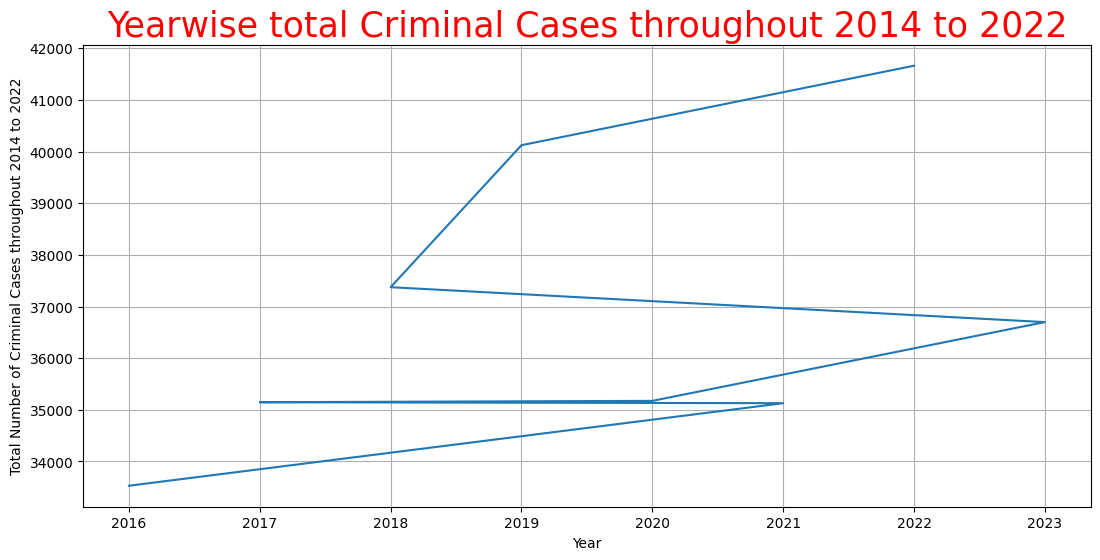

In [ ]:
# Creating a Countplot
df2 = df[df['REPORT_YEAR'] > 2015]
yearwise_total_crime = df2.groupby('REPORT_YEAR').size()
print(yearwise_total_crime)

plt.figure(figsize=(13,6))
ct = yearwise_total_crime.sort_values(ascending=True)
ax = ct.plot.line()
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Criminal Cases throughout 2014 to 2022')
ax.set_title('Yearwise total Criminal Cases throughout 2014 to 2022',color = 'red',fontsize=25)
ax.grid(linestyle='-')
plt.show()

#### Plotting Pie chart for crime according to premisetype

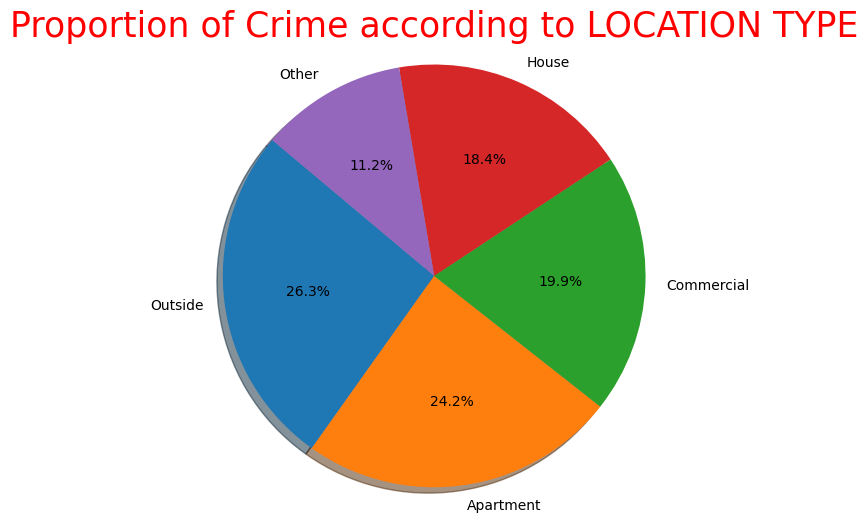

In [ ]:
# Proportion of crime according to premisetype
premise_type = df.groupby('LOCATION_TYPE').size()
premise_type.head()
labels = ['Outside','Apartment','Commercial','House','Other']
count = [54253,49996,41081,37927,23178]
explode = (0, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize = (6,6))
ax.pie(count, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion of Crime according to LOCATION TYPE", color='red', fontsize=25)
plt.show()

#### Plotting Bar graph for assault crimes in toronto

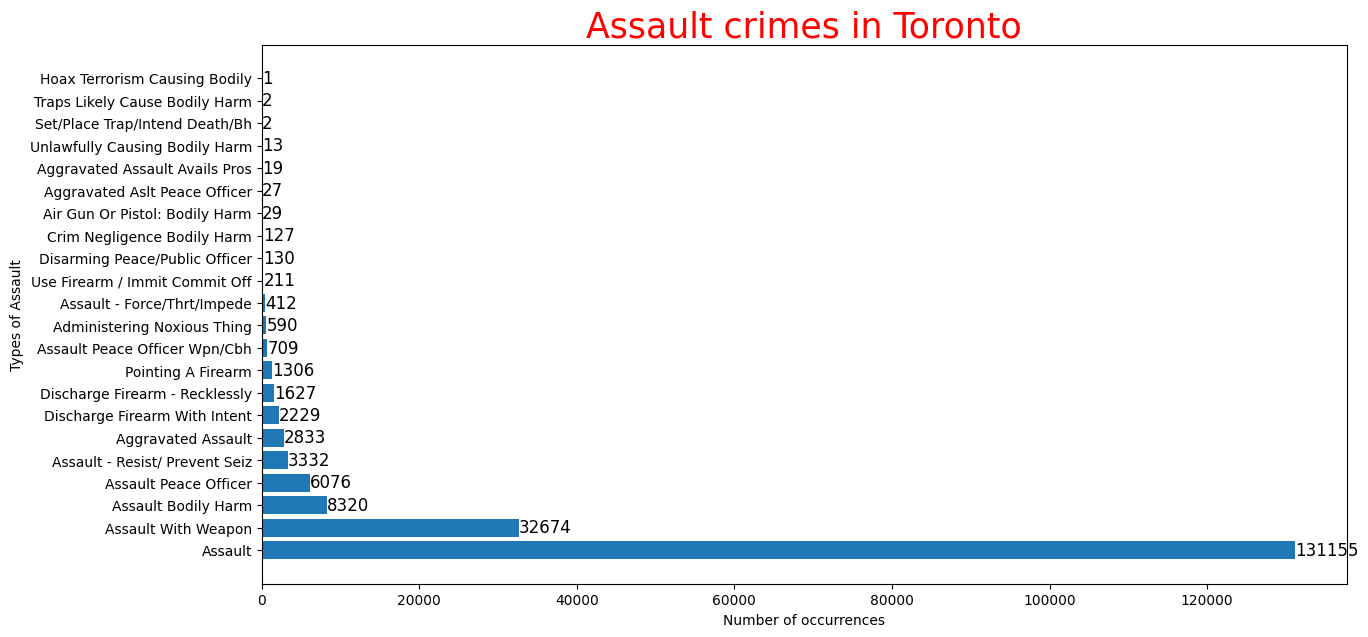

In [ ]:
assault = df[df['MCI_CATEGORY'] == 'Assault']
assault_types = assault.groupby('OFFENCE', as_index=False).size()
assault_types = assault_types.sort_values(by='size', ascending=False)

plt.figure(figsize=(14, 7))
plt.barh(assault_types['OFFENCE'], assault_types['size'])
plt.xlabel('Number of occurrences')
plt.ylabel('Types of Assault')
plt.title('Assault crimes in Toronto', color='red', fontsize=25)

# Annotate the bars with their values
for i, v in enumerate(assault_types['size']):
    plt.text(v, i, str(v), va='center', fontsize=12)

plt.show()


#### Plotting line graph for crime types by hour of day

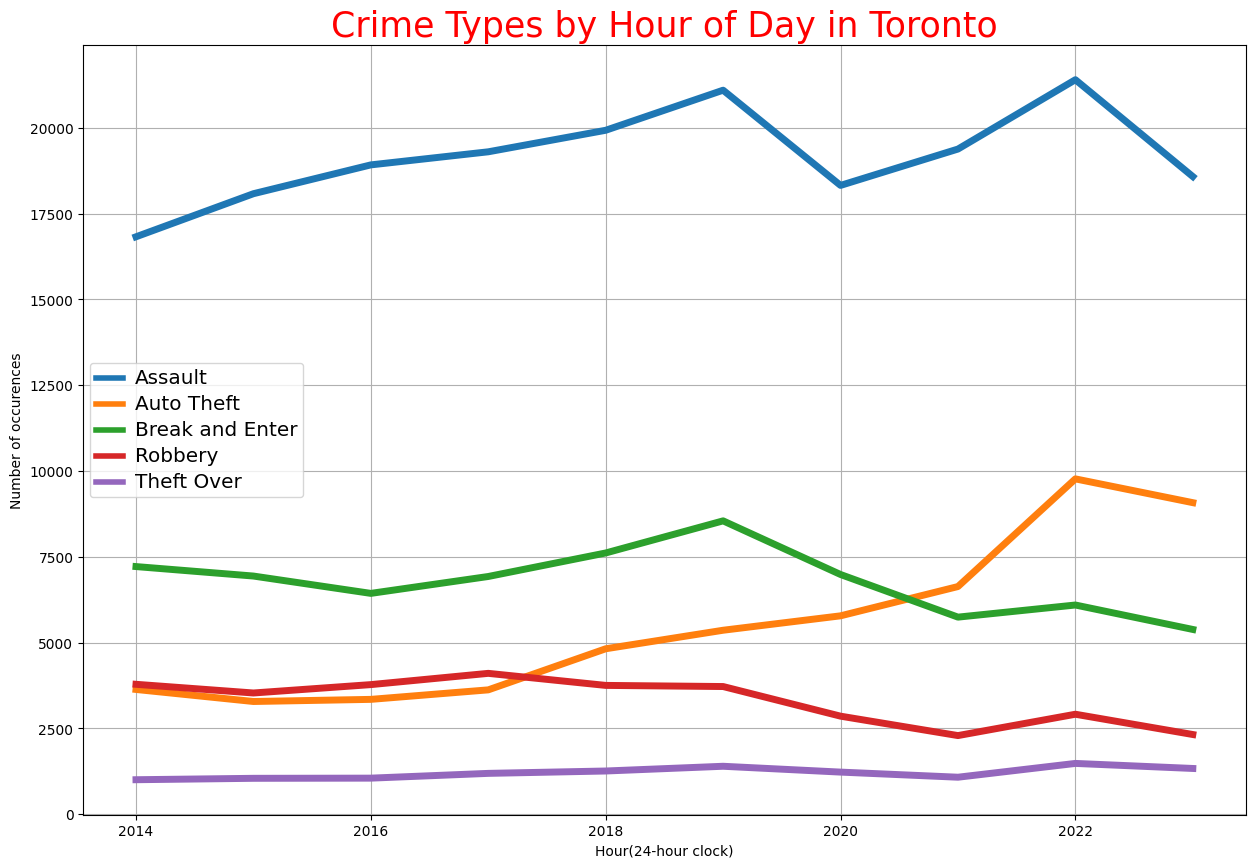

In [ ]:
hour_crime_group = df.groupby(['REPORT_YEAR','MCI_CATEGORY'],as_index=False).agg({'Total':'sum'})
#print(hour_crime_group)

fig, ax = plt.subplots(figsize=(15,10))
hour_crime_group.groupby('MCI_CATEGORY').plot(x="REPORT_YEAR", y="Total", ax=ax,linewidth=5)
ax.set_xlabel('Hour(24-hour clock)')
ax.set_ylabel('Number of occurences')
ax.set_title('Crime Types by Hour of Day in Toronto',color = 'red',fontsize=25)
ax.grid(linestyle='-')
leg = plt.legend([v[0] for v in hour_crime_group.groupby('MCI_CATEGORY')['MCI_CATEGORY']])
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
# bulk-set the properties of all lines and texts
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='x-large')
plt.show()

#### Plotting bar graph for Neighbourhoods with most crimes Top 20

                         NEIGHBOURHOOD_158  size
140                 West Humber-Clairville  9989
93                               Moss Park  8452
36                     Downtown Yonge East  7531
153                     Yonge-Bay Corridor  7120
157                York University Heights  6959
138                       Wellington Place  6762
74                    Kensington-Chinatown  6360
97                                     NSA  5622
139                              West Hill  5592
3                                    Annex  5259
53                  Glenfield-Jane Heights  4765
25                        Church-Wellesley  4693
125                        South Riverdale  4634
105               Oakdale-Beverley Heights  4565
126  St Lawrence-East Bayfront-The Islands  4399
26                     Clairlea-Birchmount  4332
95       Mount Olive-Silverstone-Jamestown  4242
146                       Wexford/Maryvale  4210
46                   Etobicoke City Centre  4066
158                 

<Figure size 1500x600 with 0 Axes>

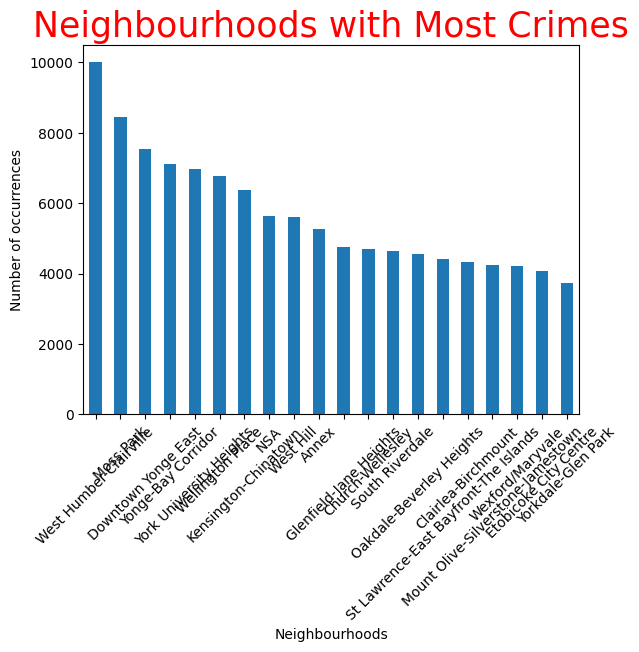

In [ ]:
location_group = df.groupby('NEIGHBOURHOOD_158', as_index=False).size().sort_values(by='size', ascending=False).head(20)
print(location_group)

plt.figure(figsize=(15, 6))
ax = location_group.plot.bar(x='NEIGHBOURHOOD_158', y='size', legend=False)
ax.set_xlabel('Neighbourhoods')
ax.set_ylabel('Number of occurrences')
ax.set_title('Neighbourhoods with Most Crimes', color='red', fontsize=25)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

#### Plotting Heatmap for Major Crime indicator by Month

<ipython-input-14-a0cc07550276>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  crime_count = mci_monthwise.pivot("MCI_CATEGORY","REPORT_MONTH","Total" )


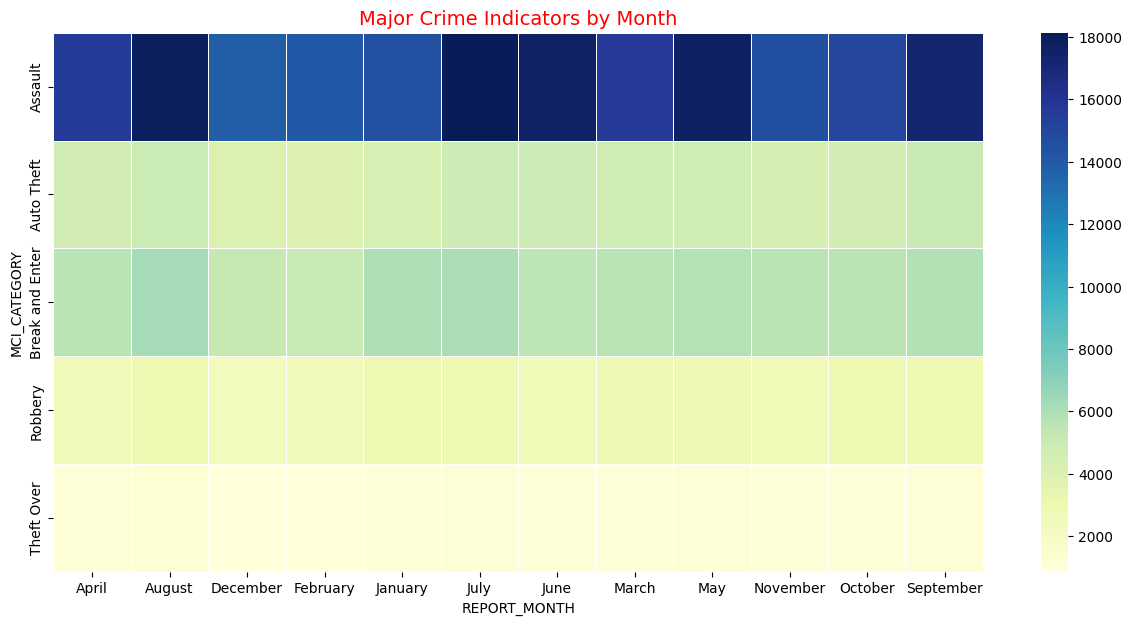

In [ ]:
# Plot a heatmap
mci_monthwise = df.groupby(['REPORT_MONTH','MCI_CATEGORY'],as_index=False).agg({'Total':'sum'})

plt.figure(figsize=(15, 7))
crime_count = mci_monthwise.pivot("MCI_CATEGORY","REPORT_MONTH","Total" )

plt.yticks(rotation=1)
ax = sns.heatmap(crime_count,cmap="YlGnBu", linewidths=.5)
plt.title("Major Crime Indicators by Month",color = 'red',fontsize=14)
plt.show()

### Data Preprocessing

In [ ]:
# Columns for the models
col_list = ['REPORT_YEAR',	'REPORT_MONTH','REPORT_DAY','OCC_YEAR','OCC_DOW','OCC_HOUR','MCI_CATEGORY',	'DIVISION',	'HOOD_158','LOCATION_TYPE']

# New dataframe from columns
df2 = df[col_list]
df2 = df2[df2['REPORT_YEAR'] > 2013]

#Factorize dependent variable column:
crime_var = pd.factorize(df2['MCI_CATEGORY'])
df2['MCI_CATEGORY'] = crime_var[0]
definition_list_MCI = crime_var[1]

#factorize independent variables:
premise_var = pd.factorize(df2['LOCATION_TYPE'])
df2['LOCATION_TYPE'] = premise_var[0]
definition_list_premise = premise_var[1]

#factorize occurenceyear:
year_var = pd.factorize(df2['REPORT_YEAR'])
df2['REPORT_YEAR'] = year_var[0]
definition_list_year = year_var[1]

#factorize occurencemonth:
month_var = pd.factorize(df2['REPORT_MONTH'])
df2['REPORT_MONTH'] = month_var[0]
definition_list_month = month_var[1]

#factorize occurenceday:
day_var = pd.factorize(df2['REPORT_DAY'])
df2['REPORT_DAY'] = day_var[0]
definition_list_day = day_var[1]

#factorize occurencedayofweek:
dayweek_var = pd.factorize(df2['OCC_DOW'])
df2['OCC_DOW'] = dayweek_var[0]
definition_list_day = dayweek_var[1]

#factorize division:
division_var = pd.factorize(df2['DIVISION'])
df2['DIVISION'] = division_var[0]
definition_list_division = division_var[1]

#factorize HOOD_ID:
hood_var = pd.factorize(df2['HOOD_158'])
df2['HOOD_158'] = hood_var[0]
definition_list_hood = hood_var[1]

#factorize occurencehour:
hour_var = pd.factorize(df2['OCC_HOUR'])
df2['OCC_HOUR'] = hour_var[0]
definition_list_hour = hour_var[1]

#factorize occurencedayofyear:
dayyear_var = pd.factorize(df2['OCC_YEAR'])
df2['OCC_YEAR'] = dayyear_var[0]
definition_list_dayyear = dayyear_var[1]

#### Splitting the dataset into training and tests set

In [ ]:
#set X and Y:
X = df2.drop(['MCI_CATEGORY'],axis=1).values
y = df2['MCI_CATEGORY'].values

#split the data into train and test sets for numeric encoded dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

#need to OneHotEncode all the X variables for input into the classification model:
binary_encoder = OneHotEncoder(sparse=False,categories='auto')
encoded_X = binary_encoder.fit_transform(X)
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(encoded_X, y, test_size = 0.25, random_state = 21)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Crime Predictions
---
### Predicting the type of major crime committed based on time of day, neighbourhood, division, year, month, etc.
#### Classification Analysis
When the true goal of data analysis is to be able to predict which of several non-overlapping groups an observation belongs to, the techniques we use are known as classification techniques.It is a Data analysis task, i.e. the process of finding a model that describes and distinguishes data classes and concepts. Classification is the problem of identifying to which of a set of categories (subpopulations), a new observation belongs to, on the basis of a training set of data containing observations and whose categories membership is known.


---
#### Data Preprocessing

In [ ]:
# Numeric Encoded Model
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy of Random Forest : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))

Accuracy of Random Forest :  0.6749364220906859
[[41514  2955  1024  2429    94]
 [ 7873  7812   142   978   127]
 [ 4323   365  3125   513    11]
 [ 4232  1076   228  8263    54]
 [ 1662   615    48   522    62]]
                 precision    recall  f1-score   support

        Assault       0.70      0.86      0.77     48016
Break and Enter       0.61      0.46      0.53     16932
        Robbery       0.68      0.37      0.48      8337
     Auto Theft       0.65      0.60      0.62     13853
     Theft Over       0.18      0.02      0.04      2909

       accuracy                           0.67     90047
      macro avg       0.56      0.46      0.49     90047
   weighted avg       0.66      0.67      0.65     90047



In [ ]:
#One Hot Encoded Model
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_OH, y_train_OH)
y_pred_OH = classifier.predict(X_test_OH)

print("Accuracy of Random Forest with OneHotEncoder : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test_OH, y_pred_OH))
print(classification_report(y_test_OH,y_pred_OH, target_names=definition_list_MCI))

Accuracy of Random Forest with OneHotEncoder :  0.6749364220906859
[[42081  2681   864  2328    62]
 [ 7620  8128   131   946   107]
 [ 4296   342  3200   487    12]
 [ 4028   939   163  8685    38]
 [ 1627   649    47   531    55]]
                 precision    recall  f1-score   support

        Assault       0.71      0.88      0.78     48016
Break and Enter       0.64      0.48      0.55     16932
        Robbery       0.73      0.38      0.50      8337
     Auto Theft       0.67      0.63      0.65     13853
     Theft Over       0.20      0.02      0.03      2909

       accuracy                           0.69     90047
      macro avg       0.59      0.48      0.50     90047
   weighted avg       0.67      0.69      0.67     90047



In [ ]:
#Balanced Class Weight doesn't make a big difference for results:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42, class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy of Random Forest with Balanced class weight: ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))

Accuracy of Random Forest with Balanced class weight:  0.6696058724888114
[[41529  2916  1080  2385   106]
 [ 8324  7390   142   947   129]
 [ 4359   314  3166   485    13]
 [ 4384  1036   225  8147    61]
 [ 1714   575    45   511    64]]
                 precision    recall  f1-score   support

        Assault       0.69      0.86      0.77     48016
Break and Enter       0.60      0.44      0.51     16932
        Robbery       0.68      0.38      0.49      8337
     Auto Theft       0.65      0.59      0.62     13853
     Theft Over       0.17      0.02      0.04      2909

       accuracy                           0.67     90047
      macro avg       0.56      0.46      0.48     90047
   weighted avg       0.65      0.67      0.65     90047



#### Random Forest Classifier with One hot Encoder shows modest improvement in accuracy with F1-score of 0.77
---
### Conclusion :

A multi-class classification model using a Random Forest classifier is built to predict the type of major crime committed based on time of day, neighbourhood, division, year, month, etc. The dataset includes every major crime committed from 2014-2022* in the city of Toronto, with detailed information about the location and time of offence. The data contains only categorical variables so the modeling process tests both numeric encoding and OneHot encoding, with some improvement with the latter approach.
The model performs reasonably well on F1-score (precision and recall) for a five-class classification problem. Though the data set is somewhat unbalanced towards assaults (higher volume), balancing class weights does not materially impact model performance.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a KNN classifier with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier to your training data
knn_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of K-Nearest Neighbors: ", accuracy_knn)

# Print confusion matrix
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(confusion_matrix_knn)

# Print classification report (you can specify target_names as needed)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=definition_list_MCI))

Accuracy of K-Nearest Neighbors:  0.5396959365664598
Confusion Matrix:
[[38718  4671  1485  3011   131]
 [11116  4295   457   985    79]
 [ 5569   770  1300   665    33]
 [ 7747  1260   542  4251    53]
 [ 1927   502   112   334    34]]
Classification Report:
                 precision    recall  f1-score   support

        Assault       0.59      0.81      0.68     48016
Break and Enter       0.37      0.25      0.30     16932
        Robbery       0.33      0.16      0.21      8337
     Auto Theft       0.46      0.31      0.37     13853
     Theft Over       0.10      0.01      0.02      2909

       accuracy                           0.54     90047
      macro avg       0.37      0.31      0.32     90047
   weighted avg       0.49      0.54      0.50     90047



In [ ]:
# Create a KNN classifier with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier to your training data
knn_classifier.fit(X_train_OH, y_train_OH)

# Predict on the test data
y_pred_OH_knn = knn_classifier.predict(X_test_OH)

# Calculate and print accuracy
accuracy_knn_OH = accuracy_score(y_test_OH, y_pred_OH_knn)
print("Accuracy of K-Nearest Neighbors with OneHotEncoder: ", accuracy_knn_OH)

# Print confusion matrix
confusion_matrix_knn_OH = confusion_matrix(y_test_OH, y_pred_OH_knn)
print("Confusion Matrix:")
print(confusion_matrix_knn_OH)

# Print classification report (you can specify target_names as needed)
print("Classification Report:")
print(classification_report(y_test_OH, y_pred_OH_knn, target_names=definition_list_MCI))

Accuracy of K-Nearest Neighbors with OneHotEncoder:  0.5959332348662365
Confusion Matrix:
[[40690  3806  1360  2090    70]
 [10045  5632   268   932    55]
 [ 5744   569  1571   435    18]
 [ 6273  1247   549  5732    52]
 [ 1903   489    88   392    37]]
Classification Report:
                 precision    recall  f1-score   support

        Assault       0.63      0.85      0.72     48016
Break and Enter       0.48      0.33      0.39     16932
        Robbery       0.41      0.19      0.26      8337
     Auto Theft       0.60      0.41      0.49     13853
     Theft Over       0.16      0.01      0.02      2909

       accuracy                           0.60     90047
      macro avg       0.46      0.36      0.38     90047
   weighted avg       0.56      0.60      0.56     90047



In [ ]:
# Create a KNN classifier with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')  # Use 'distance' for weighted KNN

# Fit the KNN classifier to your training data
knn_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of K-Nearest Neighbors with Weighted KNN: ", accuracy_knn)

# Print confusion matrix
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(confusion_matrix_knn)

# Print classification report (you can specify target_names as needed)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=definition_list_MCI))

Accuracy of K-Nearest Neighbors with Weighted KNN:  0.5640054638133419
Confusion Matrix:
[[36799  5091  2075  3758   293]
 [ 9470  5064   658  1467   273]
 [ 3996   656  2935   696    54]
 [ 5988  1246   582  5900   137]
 [ 1650   611   131   428    89]]
Classification Report:
                 precision    recall  f1-score   support

        Assault       0.64      0.77      0.69     48016
Break and Enter       0.40      0.30      0.34     16932
        Robbery       0.46      0.35      0.40      8337
     Auto Theft       0.48      0.43      0.45     13853
     Theft Over       0.11      0.03      0.05      2909

       accuracy                           0.56     90047
      macro avg       0.42      0.37      0.39     90047
   weighted avg       0.53      0.56      0.54     90047



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Decision Stump (Decision Tree with max_depth=1)
stump_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)

# Fit the Decision Stump to your training data
stump_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_stump = stump_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_stump = accuracy_score(y_test, y_pred_stump)
print("Accuracy of Decision Stump: ", accuracy_stump)

# Print confusion matrix
confusion_matrix_stump = confusion_matrix(y_test, y_pred_stump)
print("Confusion Matrix:")
print(confusion_matrix_stump)

# Print classification report (you can specify target_names as needed)
print("Classification Report:")
print(classification_report(y_test, y_pred_stump, target_names=definition_list_MCI))

Accuracy of Decision Stump:  0.5332326451741868
Confusion Matrix:
[[48016     0     0     0     0]
 [16932     0     0     0     0]
 [ 8337     0     0     0     0]
 [13853     0     0     0     0]
 [ 2909     0     0     0     0]]
Classification Report:
                 precision    recall  f1-score   support

        Assault       0.53      1.00      0.70     48016
Break and Enter       0.00      0.00      0.00     16932
        Robbery       0.00      0.00      0.00      8337
     Auto Theft       0.00      0.00      0.00     13853
     Theft Over       0.00      0.00      0.00      2909

       accuracy                           0.53     90047
      macro avg       0.11      0.20      0.14     90047
   weighted avg       0.28      0.53      0.37     90047



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Fit the Decision Stump to your one-hot encoded training data
stump_classifier.fit(X_train_OH, y_train_OH)

# Predict on the one-hot encoded test data
y_pred_stump_OH = stump_classifier.predict(X_test_OH)

# Calculate and print accuracy
accuracy_stump_OH = accuracy_score(y_test_OH, y_pred_stump_OH)
print("Accuracy of Decision Stump with OneHotEncoder: ", accuracy_stump_OH)

# Print confusion matrix
confusion_matrix_stump_OH = confusion_matrix(y_test_OH, y_pred_stump_OH)
print("Confusion Matrix:")
print(confusion_matrix_stump_OH)

# Print classification report (you can specify target_names as needed)
print("Classification Report:")
print(classification_report(y_test_OH, y_pred_stump_OH, target_names=definition_list_MCI))

Accuracy of Decision Stump with OneHotEncoder:  0.5617288749208746
Confusion Matrix:
[[45885     0     0  2131     0]
 [16922     0     0    10     0]
 [ 7677     0     0   660     0]
 [ 9156     0     0  4697     0]
 [ 2478     0     0   431     0]]
Classification Report:
                 precision    recall  f1-score   support

        Assault       0.56      0.96      0.71     48016
Break and Enter       0.00      0.00      0.00     16932
        Robbery       0.00      0.00      0.00      8337
     Auto Theft       0.59      0.34      0.43     13853
     Theft Over       0.00      0.00      0.00      2909

       accuracy                           0.56     90047
      macro avg       0.23      0.26      0.23     90047
   weighted avg       0.39      0.56      0.44     90047



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Fit the Decision Stump to your data
stump_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_stump = stump_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_stump = accuracy_score(y_test, y_pred_stump)
print("Accuracy of Decision Stump with Balanced class weight: ", accuracy_stump)

# Print confusion matrix
confusion_matrix_stump = confusion_matrix(y_test, y_pred_stump)
print("Confusion Matrix:")
print(confusion_matrix_stump)

# Print classification report (you can specify target_names as needed)
print("Classification Report:")
print(classification_report(y_test, y_pred_stump, target_names=definition_list_MCI))

Accuracy of Decision Stump with Balanced class weight:  0.5332326451741868
Confusion Matrix:
[[48016     0     0     0     0]
 [16932     0     0     0     0]
 [ 8337     0     0     0     0]
 [13853     0     0     0     0]
 [ 2909     0     0     0     0]]
Classification Report:
                 precision    recall  f1-score   support

        Assault       0.53      1.00      0.70     48016
Break and Enter       0.00      0.00      0.00     16932
        Robbery       0.00      0.00      0.00      8337
     Auto Theft       0.00      0.00      0.00     13853
     Theft Over       0.00      0.00      0.00      2909

       accuracy                           0.53     90047
      macro avg       0.11      0.20      0.14     90047
   weighted avg       0.28      0.53      0.37     90047



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Gradient Boosting Classifier model
classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Accuracy of Gradient Boosting Classifier: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=definition_list_MCI))

Accuracy of Gradient Boosting Classifier:  0.6199651293213544
[[43266  1601   143  3006     0]
 [11225  4738    80   889     0]
 [ 6913   210   532   682     0]
 [ 5614   936    13  7290     0]
 [ 1985   398    28   498     0]]
                 precision    recall  f1-score   support

        Assault       0.63      0.90      0.74     48016
Break and Enter       0.60      0.28      0.38     16932
        Robbery       0.67      0.06      0.12      8337
     Auto Theft       0.59      0.53      0.56     13853
     Theft Over       0.00      0.00      0.00      2909

       accuracy                           0.62     90047
      macro avg       0.50      0.35      0.36     90047
   weighted avg       0.60      0.62      0.56     90047



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


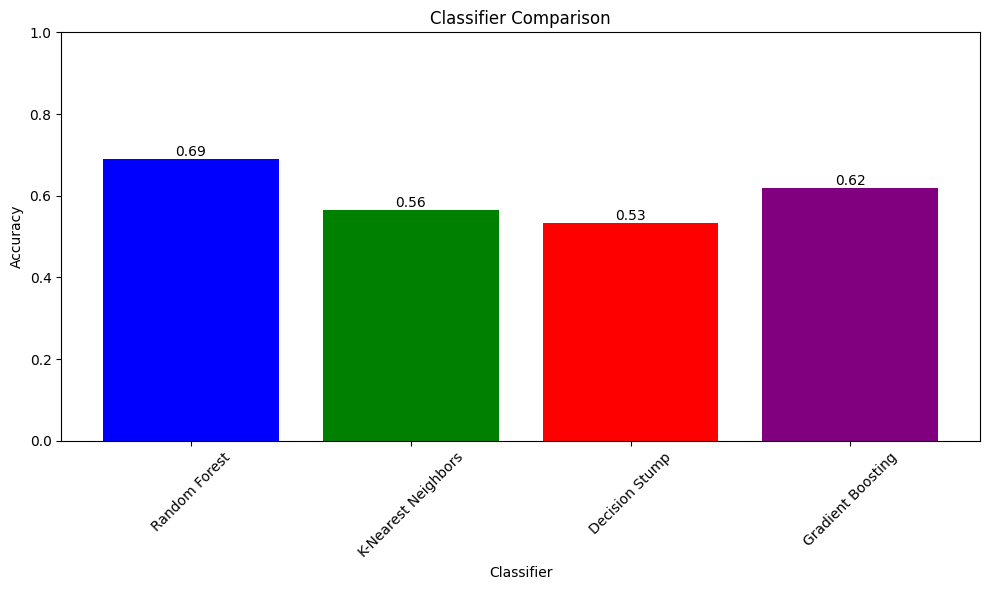

In [ ]:
import matplotlib.pyplot as plt

# Define the names of the classifiers
classifiers = ["Random Forest", "K-Nearest Neighbors", "Decision Stump", "Gradient Boosting"]

# Define the accuracy scores for each classifier
accuracy_scores = [accuracy_score(y_test, y_pred_OH),
                   accuracy_knn,
                   accuracy_stump,
                   accuracy_score(y_test, y_pred)]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores, color=['blue', 'green', 'red', 'purple'])
plt.title("Classifier Comparison")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1 for accuracy scores
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()